# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [29]:
!git clone https://github.com/ironhack-labs/lab-computer-vision.git

fatal: destination path 'lab-computer-vision' already exists and is not an empty directory.


In [30]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


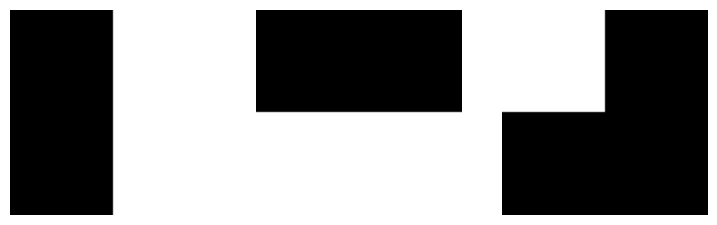

In [31]:
# solution
def img1():
    img = np.ones((100, 100), dtype=np.uint8) * 255
    img[:, :50] = 0
    return img

def img2():
    img = np.ones((100, 100), dtype=np.uint8) * 255
    img[:50, :] = 0
    return img

def img3():
    img = np.zeros((100, 100), dtype=np.uint8)
    img[:50, :50] = 255
    return img

images = [img1(), img2(), img3()]

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, img in zip(axes, images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.show()



*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

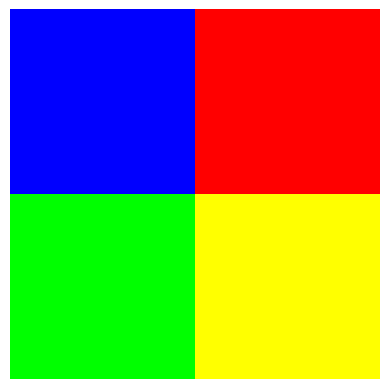

In [32]:
# solution
import numpy as np
import matplotlib.pyplot as plt

def image():
    img = np.zeros((100, 100, 3), dtype=np.uint8)

    blue = [0, 0, 255]
    red = [255, 0, 0]
    green = [0, 255, 0]
    yellow = [255, 255, 0]

    img[:50, :50] = blue
    img[:50, 50:] = red
    img[50:, :50] = green
    img[50:, 50:] = yellow

    return img

new_image = image()

plt.imshow(new_image)
plt.axis('off')
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



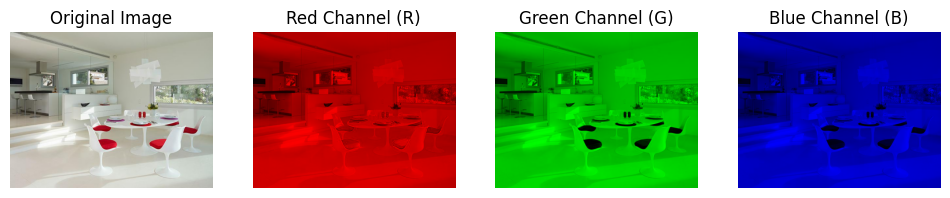

In [33]:
# solution

import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("lab-computer-vision/images/sillas.jpg")

if image is None:
    print("Error: Could not load image. Check the file path.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    red_channel = image.copy()
    red_channel[:, :, 1] = 0  # Remove green
    red_channel[:, :, 2] = 0  # Remove blue

    green_channel = image.copy()
    green_channel[:, :, 0] = 0  # Remove red
    green_channel[:, :, 2] = 0  # Remove blue

    blue_channel = image.copy()
    blue_channel[:, :, 0] = 0  # Remove red
    blue_channel[:, :, 1] = 0  # Remove green

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(red_channel)
    plt.title("Red Channel (R)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(green_channel)
    plt.title("Green Channel (G)")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(blue_channel)
    plt.title("Blue Channel (B)")
    plt.axis("off")

    plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

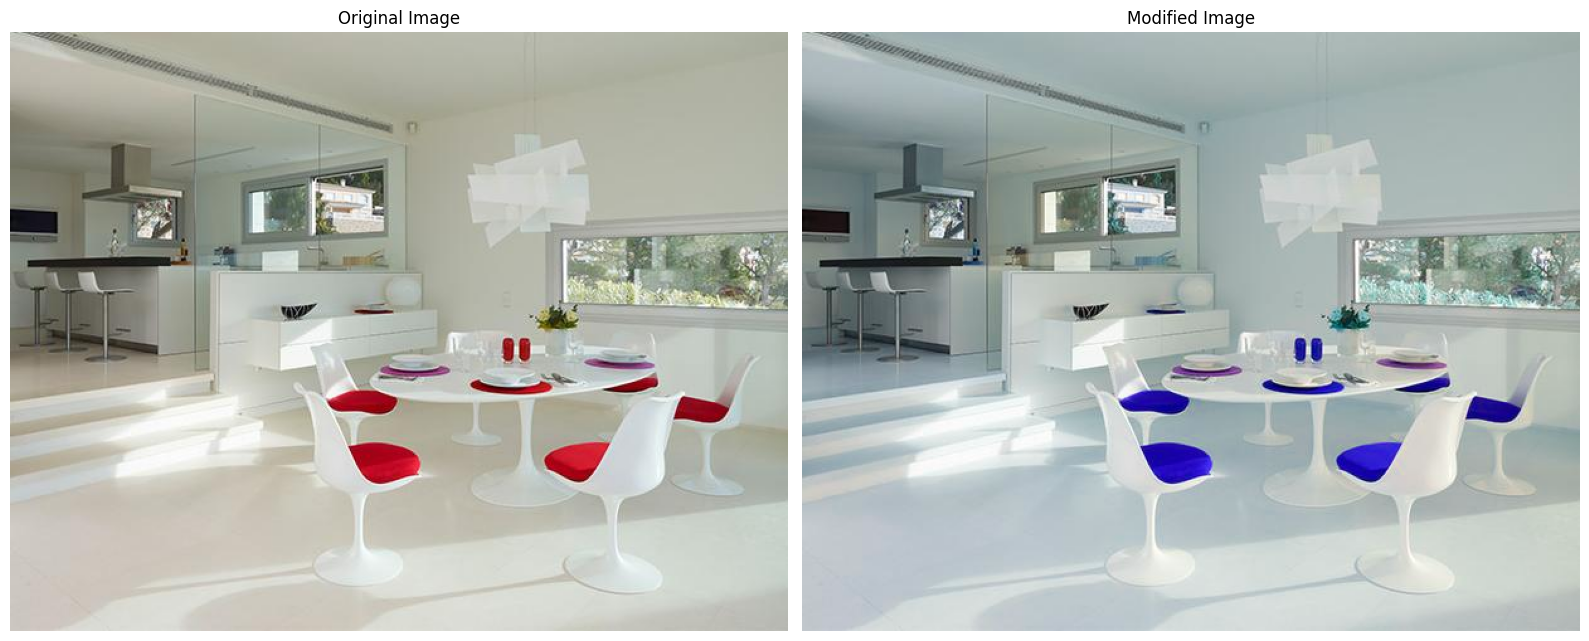

In [34]:
# solution

def red_blue():
    # image_path = 'sillas.jpg' # This line is causing the issue as the image is present in images folder.
    image_path = 'lab-computer-vision/images/sillas.jpg' # Updating path to include the images folder
    img = cv2.imread(image_path)
    # Check if image is loaded properly
    if img is None:
        print("Error: Image not loaded. Check the file path.")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_new = img.copy()
    img_new[:, :, 0] = img[:, :, 2]
    img_new[:, :, 2] = img[:, :, 0]

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(img_new)
    axes[1].set_title("Modified Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

red_blue()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

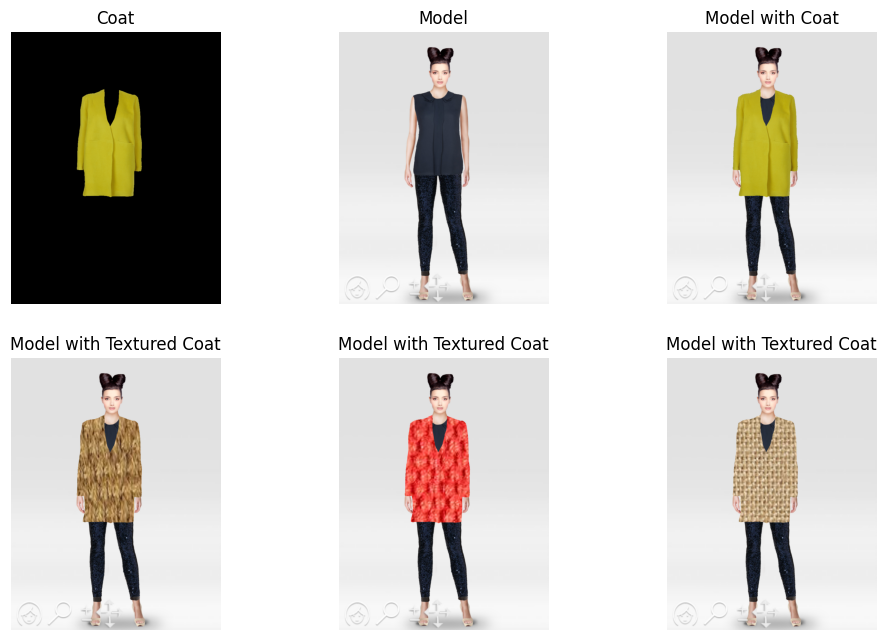

In [35]:
# solution
model_image = cv2.imread('lab-computer-vision/images/model.png')  # Update the path
coat_image = cv2.imread('lab-computer-vision/images/coat.png')   # Update the path
texture_image = cv2.imread('lab-computer-vision/images/texture.png')  # Update the path
texture_image1 = cv2.imread('lab-computer-vision/images/texture2.png') # Update the path
texture_image2 = cv2.imread('lab-computer-vision/images/texture3.jpg') # Update the path

# Check if images are loaded properly
if model_image is None or coat_image is None or texture_image is None or texture_image1 is None or texture_image2 is None:
    print("Error: One or more images not loaded. Check the file paths.")
else:
    coat_gray = cv2.cvtColor(coat_image, cv2.COLOR_BGR2GRAY)

    _, mask = cv2.threshold(coat_gray, 1, 255, cv2.THRESH_BINARY)

    texture_resized = cv2.resize(texture_image, (coat_image.shape[1], coat_image.shape[0]))
    texture_resized1 = cv2.resize(texture_image1, (coat_image.shape[1], coat_image.shape[0]))
    texture_resized2 = cv2.resize(texture_image2, (coat_image.shape[1], coat_image.shape[0]))

    texture_applied = cv2.bitwise_and(texture_resized, texture_resized, mask=mask)
    texture_applied1 = cv2.bitwise_and(texture_resized1, texture_resized1, mask=mask)
    texture_applied2 = cv2.bitwise_and(texture_resized2, texture_resized2, mask=mask)

    model_background = cv2.bitwise_and(model_image, model_image, mask=cv2.bitwise_not(mask))

    final_image = cv2.add(model_background, texture_applied)
    final_image1 = cv2.add(model_background, texture_applied1)
    final_image2 = cv2.add(model_background, texture_applied2)

    final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
    final_image_rgb1 = cv2.cvtColor(final_image1, cv2.COLOR_BGR2RGB)
    final_image_rgb2 = cv2.cvtColor(final_image2, cv2.COLOR_BGR2RGB)

    # plot all the images
    plt.figure(figsize=(12, 12))

    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(coat_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Coat")

    plt.subplot(3, 3, 2)
    plt.imshow(cv2.cvtColor(model_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Model")

    model_with_coat = cv2.add(model_background, cv2.bitwise_and(coat_image, coat_image, mask=mask))
    plt.subplot(3, 3, 3)
    plt.imshow(cv2.cvtColor(model_with_coat, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Model with Coat")

    plt.subplot(3, 3, 4)
    plt.imshow(final_image_rgb)
    plt.axis('off')
    plt.title("Model with Textured Coat")

    plt.subplot(3, 3, 5)
    plt.imshow(final_image_rgb1)
    plt.axis('off')
    plt.title("Model with Textured Coat")

    plt.subplot(3, 3, 6)
    plt.imshow(final_image_rgb2)
    plt.axis('off')
    plt.title("Model with Textured Coat")
    plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




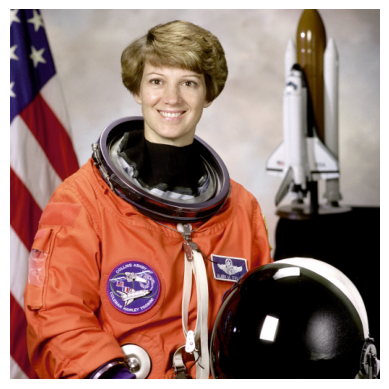

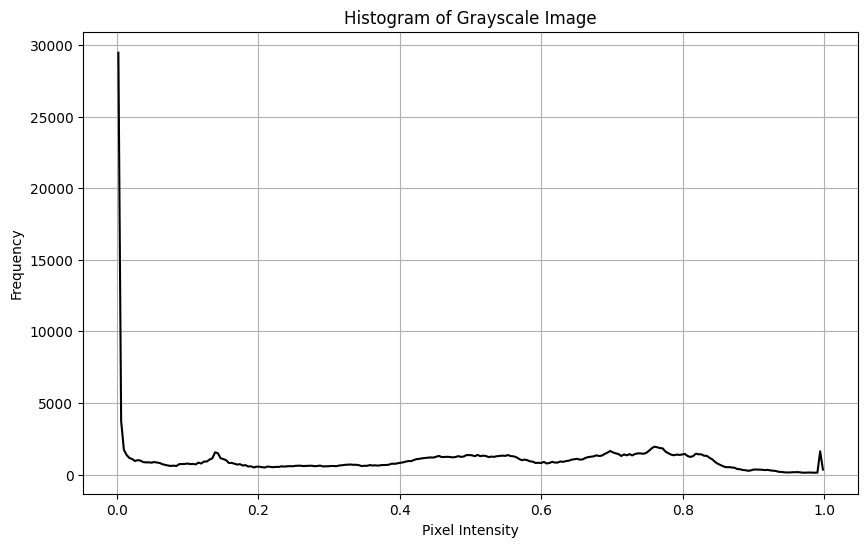

In [36]:
# solution
from skimage import io, color
from skimage.exposure import histogram
from skimage import data

astronaut_image = data.astronaut()

plt.imshow(astronaut_image)
plt.axis('off')
plt.show()

gray_image = color.rgb2gray(astronaut_image)

hist, bin_centers = histogram(gray_image)

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

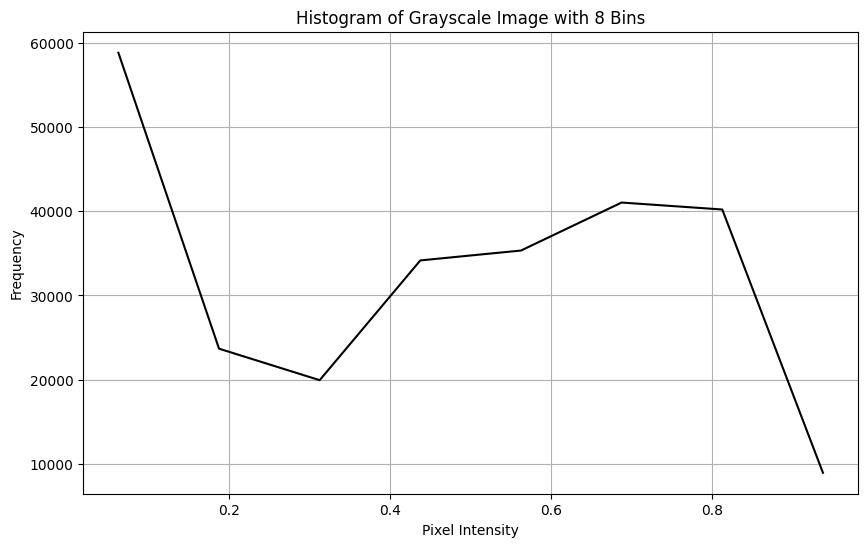

In [37]:
# solution

hist_8bins, bin_centers_8bins = histogram(gray_image, nbins=8)

plt.figure(figsize=(10, 6))
plt.plot(bin_centers_8bins, hist_8bins, color='black')
plt.title('Histogram of Grayscale Image with 8 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

 yes, inference change based on the bin count, can define the correct bin count by visualization

*  High Bins -> Many Bins

Effect on Histogram	: Preserves all details in an image, but can be noisy.

Inference Impact: Useful for fine intensity analysis

*   Low Bin Count -> Few Bins

Effect on Histogram	: Merges intensity ranges, loses details in an image.

Inference Impact: Oversimplified, misses variations


*   fewer bins: the histogram is more generalized.




...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


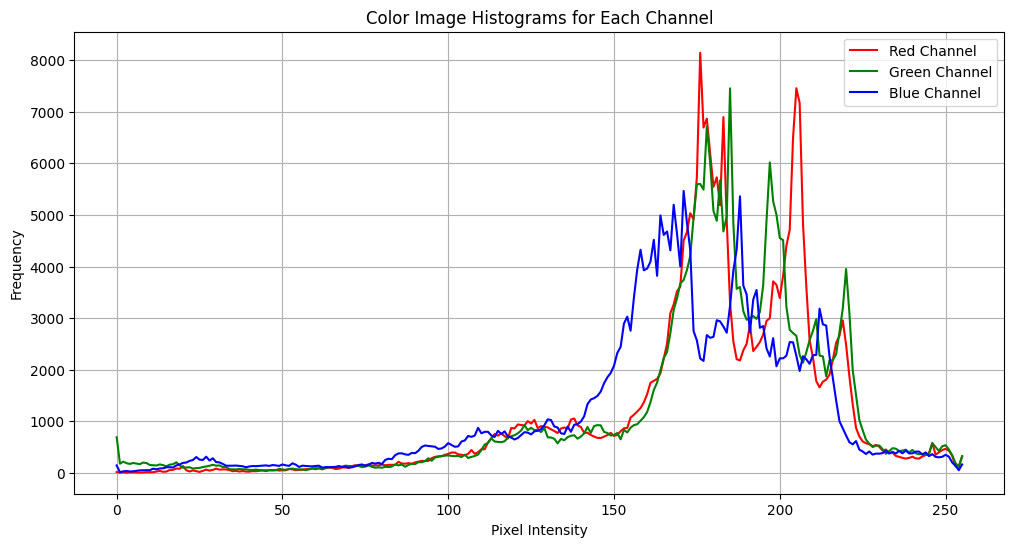

In [38]:
#solution
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

hist_red, bin_centers_red = histogram(red_channel, nbins=256)
hist_green, bin_centers_green = histogram(green_channel, nbins=256)
hist_blue, bin_centers_blue = histogram(blue_channel, nbins=256)

plt.figure(figsize=(12, 6))
plt.plot(bin_centers_red, hist_red, color='red', label='Red Channel')
plt.plot(bin_centers_green, hist_green, color='green', label='Green Channel')
plt.plot(bin_centers_blue, hist_blue, color='blue', label='Blue Channel')

plt.title('Color Image Histograms for Each Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

If the image has low contrast and uneven intensity distribution -> Use Histogram Normalization.

If the image has low contrast but intensity is clustered within a small range -> Use Linear Contrast Stretching.
...

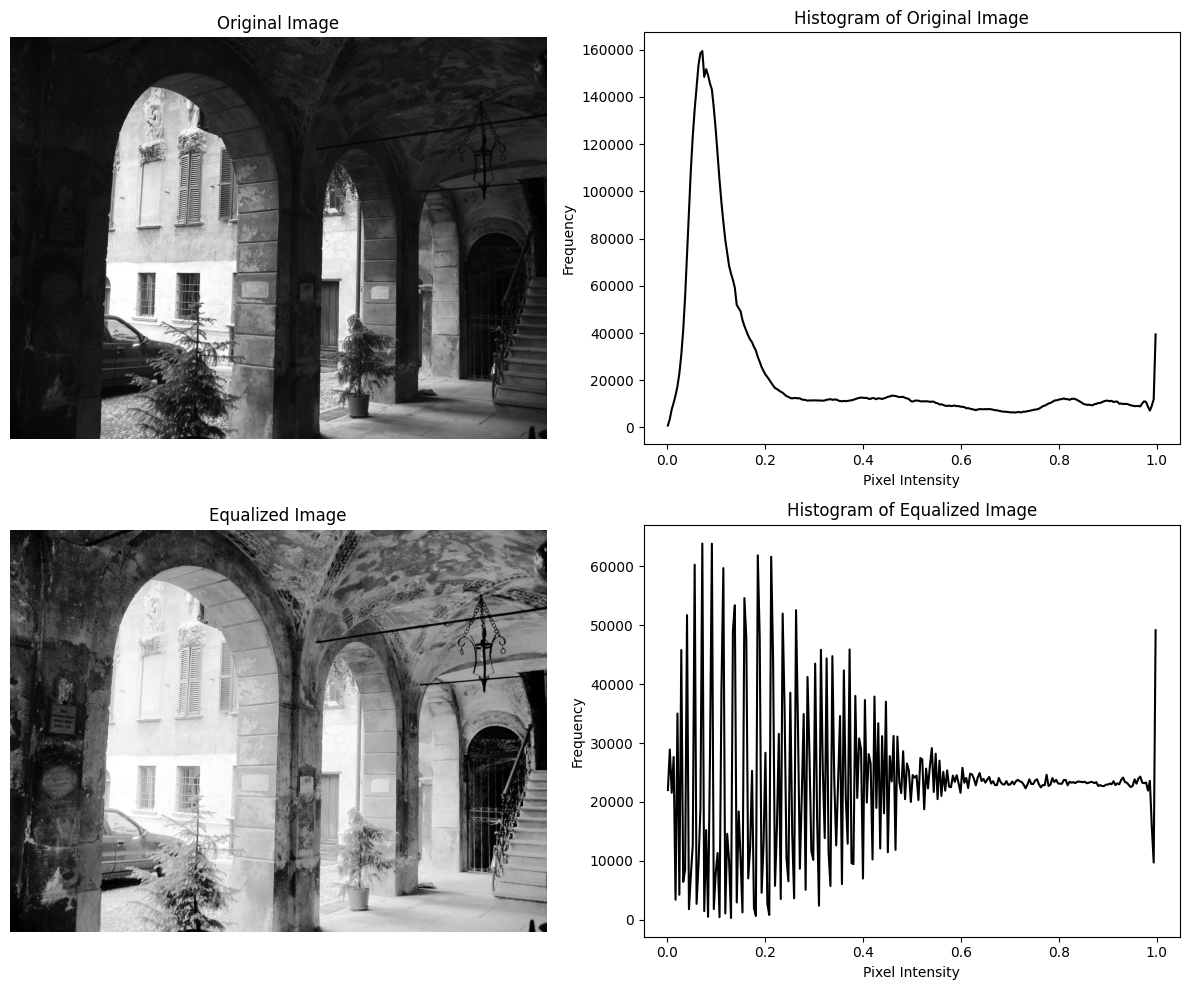

In [39]:
#solution

from skimage import io, exposure, color

image = io.imread('lab-computer-vision/images/aquatermi_lowcontrast.jpg')

gray_image = color.rgb2gray(image)

hist_original, bins_original = exposure.histogram(gray_image)

equalized_image = exposure.equalize_hist(gray_image)

hist_equalized, bins_equalized = exposure.histogram(equalized_image)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].plot(bins_original, hist_original, color='black')
axs[0, 1].set_title('Histogram of Original Image')
axs[0, 1].set_xlabel('Pixel Intensity')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title('Equalized Image')
axs[1, 0].axis('off')

axs[1, 1].plot(bins_equalized, hist_equalized, color='black')
axs[1, 1].set_title('Histogram of Equalized Image')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



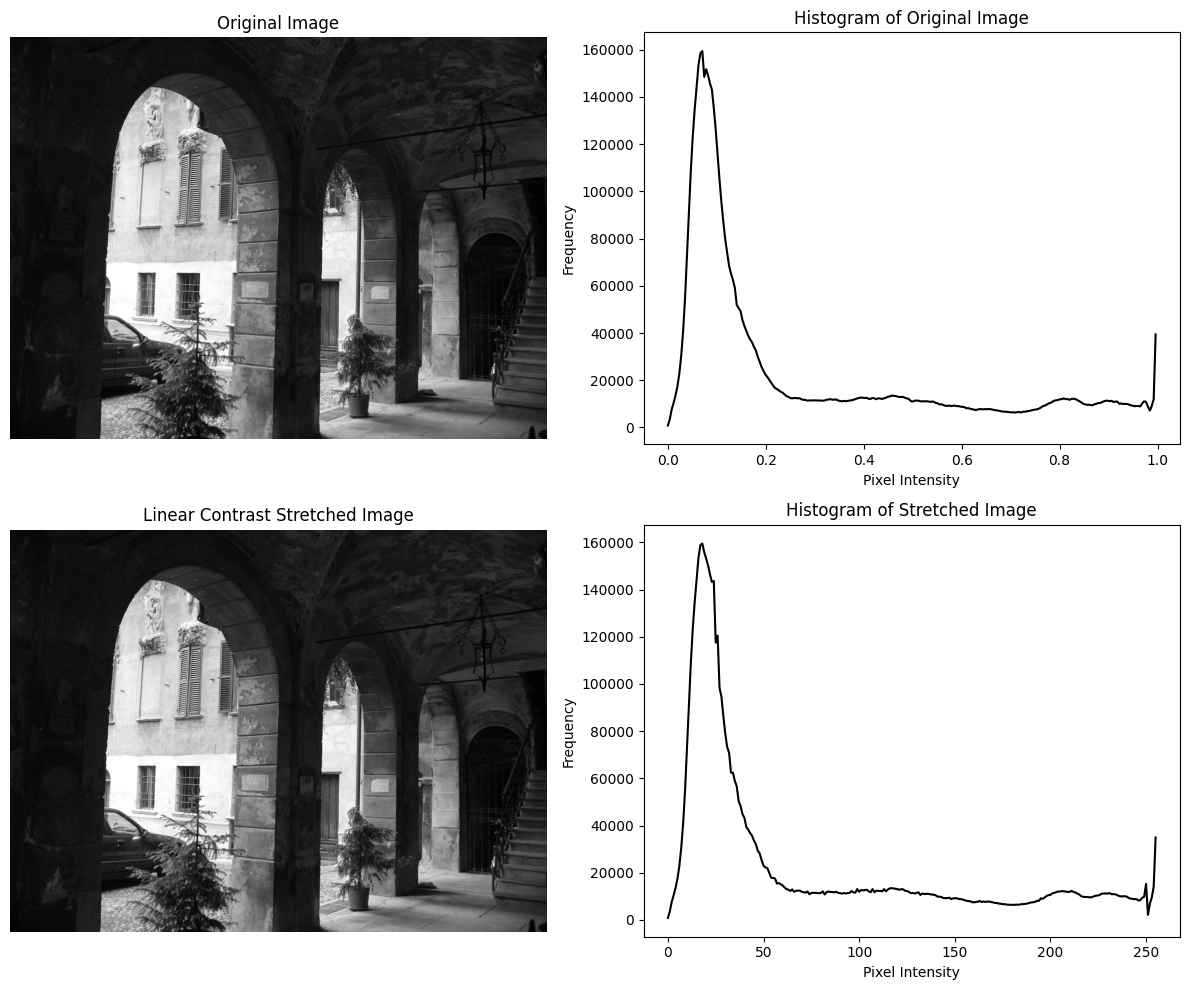

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def linear_contrast_stretch(image, nbins=256):
    image_normalized = (image - np.min(image)) / (np.max(image) - np.min(image))

    stretched_image = np.floor(image_normalized * (nbins - 1))

    return stretched_image

# Update the path to include the images folder
image = io.imread('lab-computer-vision/images/aquatermi_lowcontrast.jpg')

gray_image = color.rgb2gray(image)

hist_original, bins_original = np.histogram(gray_image.flatten(), bins=256, range=(0, 1))

stretched_image = linear_contrast_stretch(gray_image, nbins=256)

hist_stretched, bins_stretched = np.histogram(stretched_image.flatten(), bins=256, range=(0, 256))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].plot(bins_original[:-1], hist_original, color='black')
axs[0, 1].set_title('Histogram of Original Image')
axs[0, 1].set_xlabel('Pixel Intensity')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].imshow(stretched_image, cmap='gray')
axs[1, 0].set_title('Linear Contrast Stretched Image')
axs[1, 0].axis('off')

axs[1, 1].plot(bins_stretched[:-1], hist_stretched, color='black')
axs[1, 1].set_title('Histogram of Stretched Image')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




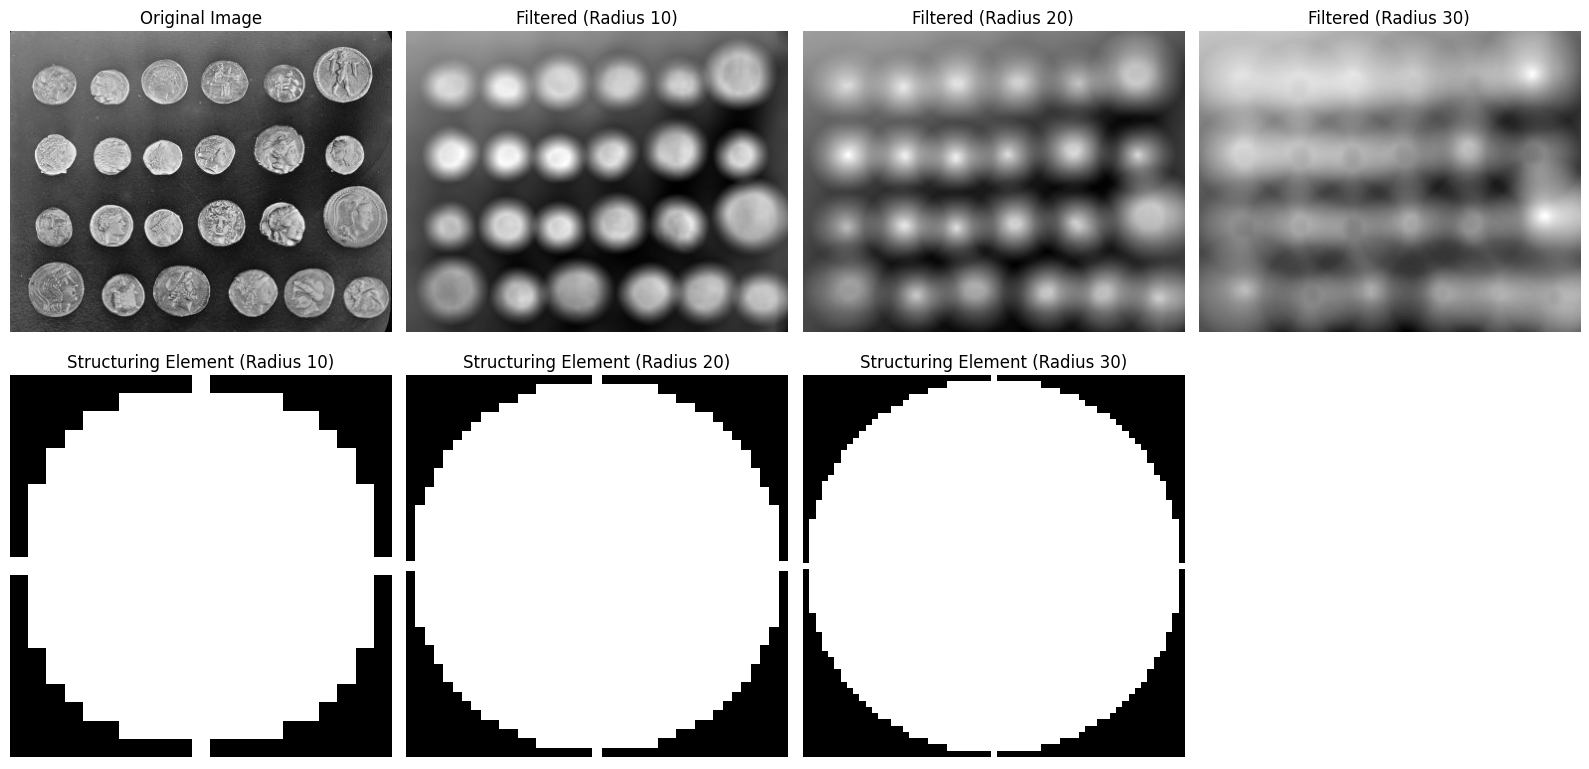

In [43]:
# solution

from skimage import data, filters, morphology, img_as_ubyte

coins_image = data.coins()

coins_image_gray = coins_image.astype(np.uint8)

selem_20 = morphology.disk(20)

filtered_20 = filters.rank.mean(coins_image_gray, selem_20)

selem_30 = morphology.disk(30)
filtered_30 = filters.rank.mean(coins_image_gray, selem_30)

selem_10 = morphology.disk(10)
filtered_10 = filters.rank.mean(coins_image_gray, selem_10)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].imshow(coins_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(filtered_10, cmap='gray')
axs[0, 1].set_title('Filtered (Radius 10)')
axs[0, 1].axis('off')

axs[0, 2].imshow(filtered_20, cmap='gray')
axs[0, 2].set_title('Filtered (Radius 20)')
axs[0, 2].axis('off')

axs[0, 3].imshow(filtered_30, cmap='gray')
axs[0, 3].set_title('Filtered (Radius 30)')
axs[0, 3].axis('off')

axs[1, 0].imshow(selem_10, cmap='gray')
axs[1, 0].set_title('Structuring Element (Radius 10)')
axs[1, 0].axis('off')

axs[1, 1].imshow(selem_20, cmap='gray')
axs[1, 1].set_title('Structuring Element (Radius 20)')
axs[1, 1].axis('off')

axs[1, 2].imshow(selem_30, cmap='gray')
axs[1, 2].set_title('Structuring Element (Radius 30)')
axs[1, 2].axis('off')

axs[1, 3].axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

<ipython-input-42-ce984c827e54>:11: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_square = morphology.square(20)  # Square
<ipython-input-42-ce984c827e54>:12: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_rectangle = morphology.rectangle(20, 40)  # Rectangle


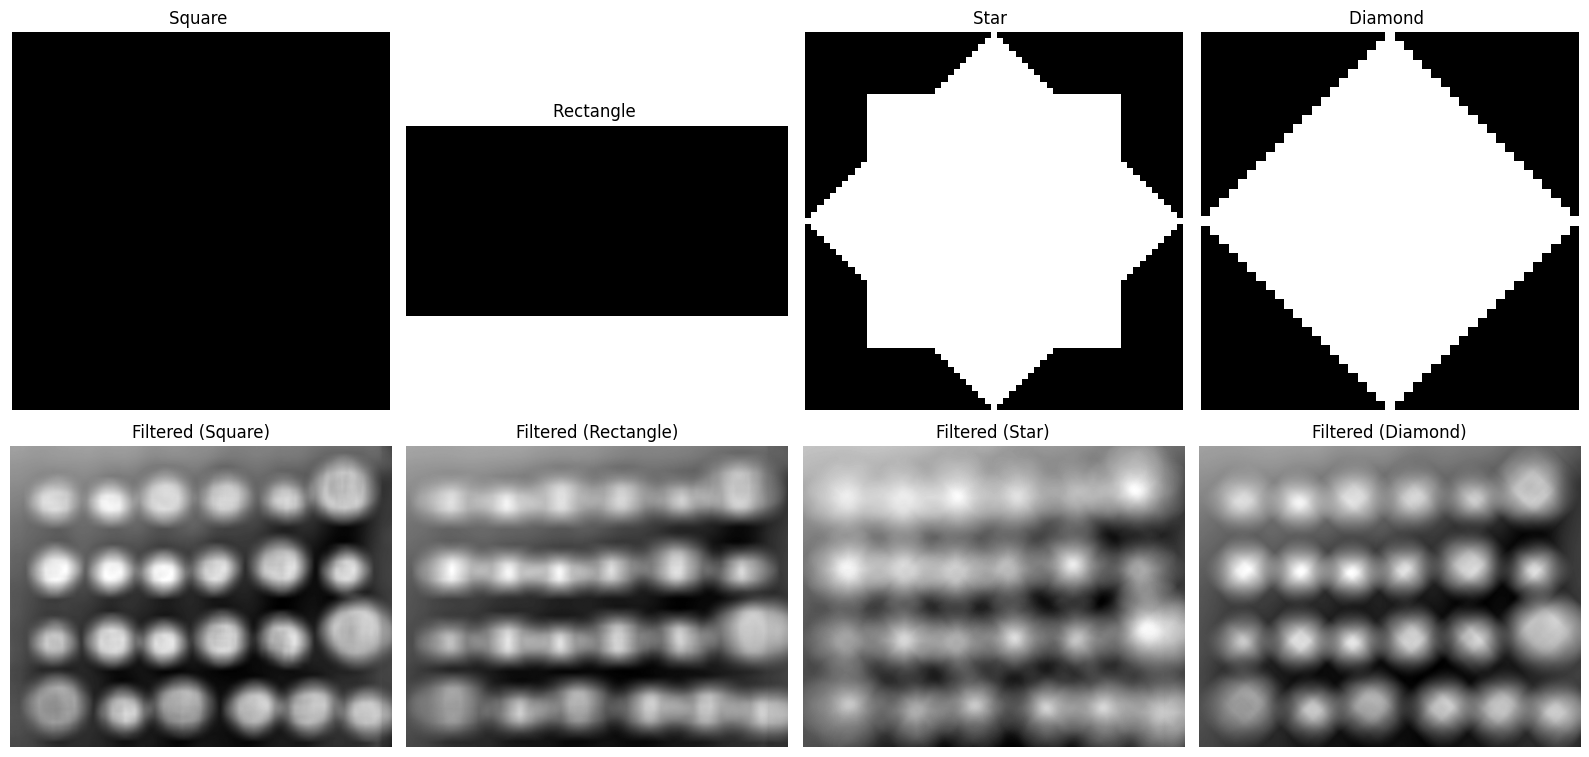

In [42]:
# solution

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, morphology

coins_image = data.coins()

coins_image_gray = coins_image.astype(np.uint8)

selem_square = morphology.square(20)  # Square
selem_rectangle = morphology.rectangle(20, 40)  # Rectangle
selem_star = morphology.star(20)  # Star
selem_diamond = morphology.diamond(20)  # Diamond

filtered_square = filters.rank.mean(coins_image_gray, selem_square)
filtered_rectangle = filters.rank.mean(coins_image_gray, selem_rectangle)
filtered_star = filters.rank.mean(coins_image_gray, selem_star)
filtered_diamond = filters.rank.mean(coins_image_gray, selem_diamond)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].imshow(selem_square, cmap='gray')
axs[0, 0].set_title('Square ')
axs[0, 0].axis('off')

axs[0, 1].imshow(selem_rectangle, cmap='gray')
axs[0, 1].set_title('Rectangle ')
axs[0, 1].axis('off')

axs[0, 2].imshow(selem_star, cmap='gray')
axs[0, 2].set_title('Star ')
axs[0, 2].axis('off')

axs[0, 3].imshow(selem_diamond, cmap='gray')
axs[0, 3].set_title('Diamond ')
axs[0, 3].axis('off')

axs[1, 0].imshow(filtered_square, cmap='gray')
axs[1, 0].set_title('Filtered (Square)')
axs[1, 0].axis('off')

axs[1, 1].imshow(filtered_rectangle, cmap='gray')
axs[1, 1].set_title('Filtered (Rectangle)')
axs[1, 1].axis('off')

axs[1, 2].imshow(filtered_star, cmap='gray')
axs[1, 2].set_title('Filtered (Star)')
axs[1, 2].axis('off')

axs[1, 3].imshow(filtered_diamond, cmap='gray')
axs[1, 3].set_title('Filtered (Diamond)')
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**


- Small radius: Maintains details with minimal blurring.  
- Large radius: Enhances smoothing, reduces noise, but may blur important features.


*   What is the observed behaviour with difference in the structuring element?



**Solution**


the choice of structuring element affects the directionality and effectiveness of the smoothing process





*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**


*   Mean Filter

Replaces each pixel with the average of its neighboring pixels.

Use for:

fast and simple smoothing, but expect loss of details.



*   Gaussian filter


Replaces each pixel with a weighted average of its neighbors, with weights decreasing according to a Gaussian distribution.



Use for:

 when preserving edges is important while removing noise.


...